In [1]:
import numpy as np
import pandas as pd
import math
from sklearn import metrics

from scipy.stats import entropy

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates #to format dates on our plots
%matplotlib inline
import seaborn as sns

# This is to make sure matplotlib doesn't throw the following error:
# The next line fixes "TypeError: float() argument must be a string or a number, not 'Timestamp' matplotlib"
pd.plotting.register_matplotlib_converters()

In [2]:
df = pd.read_csv('anonymized-curriculum-access.txt',
                      engine='python',
                     header=None,
                     index_col=False,
                     sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
                     na_values='"-"',
                     )

In [3]:
df.columns = ['date','time','page_viewed','user_id','cohort_id','ip']

In [4]:
df.index = pd.to_datetime(df.date + " " + df.time)

In [5]:
df = df.drop(columns=['date','time'], axis=1)

In [6]:
df

,page_viewed,user_id,cohort_id,ip
2018-01-26 09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61
...,...,...,...,...
2020-11-02 16:48:13,javascript-i/coffee-project,763,62.0,107.192.148.199
2020-11-02 16:48:17,javascript-i/mapbox-api,771,62.0,172.125.226.175
2020-11-02 16:48:18,javascript-i/coffee-project,771,62.0,172.125.226.175
2020-11-02 16:48:28,javascript-i/bom-and-dom/bom,771,62.0,172.125.226.175


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d303cb950>,
      dtype=object)

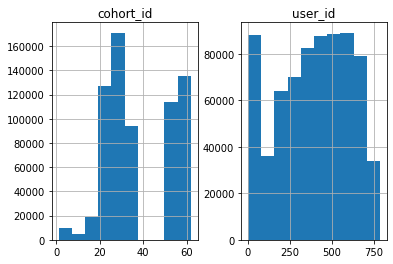

In [7]:
df.hist()

# Discover users who are accessing our curriculum pages way beyond the end of their codeup time. What would the dataframe look like? Use time series method for detecting anomalies, like exponential moving average with %b.

### Note: 44,840 observations have no cohort id, all have a user_id

In [8]:
df['cohort_id'] = df.cohort_id.fillna(0)

In [9]:
df_0 = df[df.cohort_id == 0]

In [10]:
# index range same as original df
df_0.index

DatetimeIndex(['2018-01-26 16:46:16', '2018-01-26 16:46:24',
               '2018-01-26 17:54:24', '2018-01-26 18:32:03',
               '2018-01-26 18:32:17', '2018-01-26 18:32:33',
               '2018-01-26 18:32:37', '2018-01-26 18:32:43',
               '2018-01-26 18:32:47', '2018-01-26 18:33:07',
               ...
               '2020-11-02 15:47:37', '2020-11-02 15:48:20',
               '2020-11-02 15:50:50', '2020-11-02 15:59:28',
               '2020-11-02 15:59:31', '2020-11-02 16:02:22',
               '2020-11-02 16:02:26', '2020-11-02 16:03:50',
               '2020-11-02 16:04:18', '2020-11-02 16:30:49'],
              dtype='datetime64[ns]', length=44840, freq=None)

In [11]:
for col in df_0.columns:
    print(col)
    print(df_0[col].value_counts(),'\n')

page_viewed
/                                                           4048
search/search_index.json                                    1791
javascript-i                                                 639
toc                                                          605
html-css                                                     425
                                                            ... 
content/php_iv/php-with-mysql/gitbook/images/favicon.ico       1
capstone-workbook/sw-project-planning                          1
content/laravel/more-features/readme.html                      1
Python_Libraries                                               1
2-stats/4.3-sampling                                           1
Name: page_viewed, Length: 1042, dtype: int64 

user_id
354    2965
363    2248
368    2085
349    1663
716    1656
       ... 
744       5
62        4
663       4
89        3
176       3
Name: user_id, Length: 75, dtype: int64 

cohort_id
0.0    44840
Name: cohort_id, dty

In [12]:
df.ip.str.split(".")[0][0]

'97'

In [15]:
df_0["ip_int"] = df_0.ip.str.replace(".","")

In [16]:
# Calculating the short-window simple moving average
#short_rolling = 

df_0.rolling(window=12).mean()

,user_id,cohort_id
2018-01-26 16:46:16,NaN,NaN
2018-01-26 16:46:24,NaN,NaN
2018-01-26 17:54:24,NaN,NaN
2018-01-26 18:32:03,NaN,NaN
2018-01-26 18:32:17,NaN,NaN
...,...,...
2020-11-02 16:02:22,727.833333,0.0
2020-11-02 16:02:26,727.750000,0.0
2020-11-02 16:03:50,723.166667,0.0
2020-11-02 16:04:18,723.750000,0.0


# Bonus: Can you label students who are viewing both the web dev and data science curriculum? Can you label students by the program they are in? Can you label users by student vs. staff? What are Zach, Maggie, Faith, and Ryan's ids?

Text(0, 0.5, 'count of page accesses')

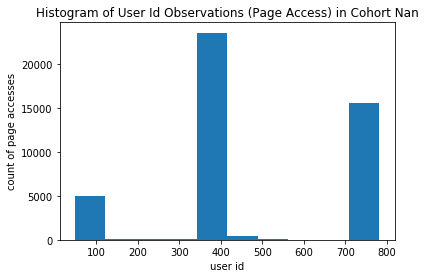

In [17]:
plt.hist(df_0.user_id)
plt.title("Histogram of User Id Observations (Page Access) in Cohort Nan")
plt.xlabel('user id')
plt.ylabel('count of page accesses')

In [18]:
df_0.user_id.mode()

0    354
dtype: int64

In [19]:
print('user_id:', df_0.groupby('user_id')['ip'].size().idxmax(), 'has the most page views at:',df_0.groupby('user_id')['ip'].size().max())

user_id: 354 has the most page views at: 2965


In [20]:
df_0[df_0.user_id == 354]

,page_viewed,user_id,cohort_id,ip,ip_int
2019-02-04 16:44:49,/,354,0.0,97.105.19.58,971051958
2019-02-04 17:04:26,/,354,0.0,97.105.19.58,971051958
2019-02-05 08:46:32,/,354,0.0,97.105.19.58,971051958
2019-02-05 09:20:34,3.0-mysql-overview,354,0.0,97.105.19.58,971051958
2019-02-05 09:20:51,1._Fundamentals,354,0.0,97.105.19.58,971051958
...,...,...,...,...,...
2020-10-20 10:46:16,python/imports,354,0.0,173.172.170.236,173172170236
2020-10-20 10:47:10,python/overview,354,0.0,173.172.170.236,173172170236
2020-10-20 10:47:15,python/introduction-to-python,354,0.0,173.172.170.236,173172170236
2020-10-20 10:47:23,python/data-types-and-variables,354,0.0,173.172.170.236,173172170236


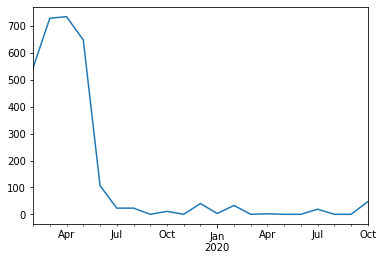

In [21]:
df_0[df_0.user_id == 354].ip.resample('M').count().plot()

## First user with no cohort id is 48, has observations from whole range of original df
- possibly lives next to Scates Park, San Antonio, TX 78209

In [22]:
df_0.groupby('user_id')['ip'].size()

user_id
48     1581
54      146
58      462
59       42
61      816
       ... 
729     461
731     528
736    1278
744       5
782     167
Name: ip, Length: 75, dtype: int64

In [23]:
df_0[df_0.user_id == 48]

,page_viewed,user_id,cohort_id,ip,ip_int
2018-01-26 16:46:16,/,48,0.0,97.105.19.61,971051961
2018-01-26 16:46:24,spring/extra-features/form-validation,48,0.0,97.105.19.61,971051961
2018-01-26 17:54:24,/,48,0.0,97.105.19.61,971051961
2018-01-26 18:32:03,/,48,0.0,97.105.19.61,971051961
2018-01-26 18:32:17,mysql/relationships/joins,48,0.0,97.105.19.61,971051961
...,...,...,...,...,...
2020-04-08 16:42:09,javascript-i/introduction/primitive-types,48,0.0,216.177.189.26,21617718926
2020-05-28 10:14:25,/,48,0.0,216.177.189.26,21617718926
2020-05-28 10:14:30,jquery,48,0.0,216.177.189.26,21617718926
2020-05-28 10:14:31,javascript-i,48,0.0,216.177.189.26,21617718926


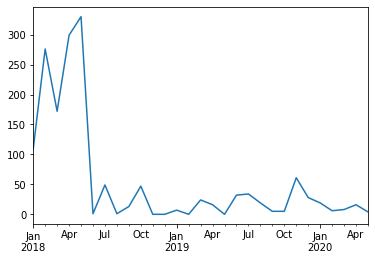

In [24]:
df_0[df_0.user_id == 48].ip.resample('M').count().plot()

In [25]:
df_0[df_0.user_id == 48].page_viewed.value_counts().head(10)

/                      115
javascript-i            52
java-ii                 52
java-iii                40
html-css                40
jquery                  38
spring                  33
javascript-ii           30
mysql                   26
java-ii/collections     25
Name: page_viewed, dtype: int64

In [26]:
df_0[df_0.user_id == 354].page_viewed.value_counts().head(10)

search/search_index.json        485
/                               313
Intro_to_Regression_Module       82
4.6.3_introduction_to_pandas     72
3.0-mysql-overview               39
Regression_Python                38
6_Exercises                      36
4.1_introduction                 31
6.4_Prep                         31
4.2_data_types_and_variables     30
Name: page_viewed, dtype: int64

In [27]:
df_0[df_0.user_id == 48].ip.value_counts()

66.69.62.219      934
216.177.189.26    394
97.105.19.61      175
99.181.55.111      55
136.62.15.120      16
206.121.139.66      7
Name: ip, dtype: int64

In [28]:
df_0[df_0.user_id == 354].ip.value_counts()

97.105.19.58       2065
45.23.250.16        741
192.171.117.210      81
173.172.170.236      24
70.114.4.43          23
23.116.219.97        19
97.77.169.2           5
107.77.218.198        3
192.67.54.12          1
107.77.219.34         1
107.77.218.225        1
68.201.199.176        1
Name: ip, dtype: int64

## Could it be Terrell? Graduated Febuary 2018 which could explain the drop in activity after April
- seems to view web dev pages for first user id
- user 48 and 354 used nearly the same ip, which both are near a house 
    - 97.105.19.61 and 97.105.19.58
    - change in Spectrum modem? Idk how ip's work
- could the second id be for viewing DS curriculum
- https://alumni.codeup.com/?cohort_id=23
- note: the url on alumni page does have a cohort id for each cohort, but I believe this is not an accurate association as the df goes from 1 to 62, and the most recent web page shows 42
- could the first 20 cohort ids be employees?

In [29]:
ip_location = pd.DataFrame(df_0.ip.value_counts().head(3))

In [30]:
ip_location

,ip
97.105.19.58,15931
70.117.16.60,1496
23.116.170.48,1255


In [31]:
ip_location['location'] = ['house by park, S.A', 'neighborhood, S.A','neighborhood, Cibolo']

In [32]:
ip_location

,ip,location
97.105.19.58,15931,"house by park, S.A"
70.117.16.60,1496,"neighborhood, S.A"
23.116.170.48,1255,"neighborhood, Cibolo"
